read the data from nist... file   
    problem may come up: can't read the data    
                         can't related the data with colunm      
                         type error     
  
    
mapping wafer    
    pro: how to mapping?    
         how to do sth like circle backgrond     
         
goal 1:
    for each pixel which pad them go

goal 2:
    for neibor pad which pixel they go

    

paper(more like backgroud introduction) or pdf 
    Fig 17
        circle
        cross (focus point)
        dark point

Airy disk

crosstalk

​
Yifu Chen
​
https://arxiv.org/pdf/1403.4302

We talked about Figure 17, and crosstalk.

https://en.wikipedia.org/wiki/Airy_disk

https://webbtelescope.org/contents/media/images/01G529MX46J7AFK61GAMSHKSSN

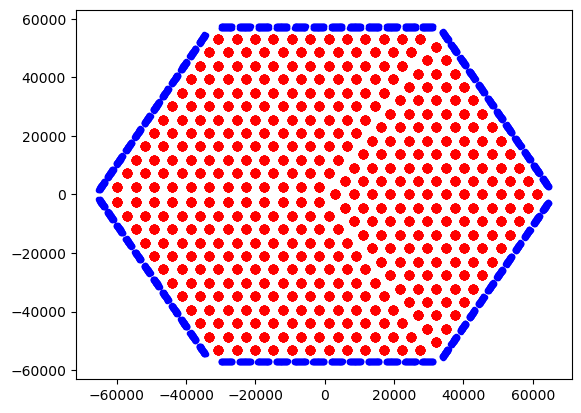

In [2]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']



# try use same method above by Pad X center,Pad Y center
pad_x_center = data['Pad X center']
pad_y_center = data['Pad Y center']


#histogram
#plt.hist2d(pixel_x_center, pixel_y_center, bins = (100,100), norm=colors.LogNorm())
plt.scatter(pixel_x_center, pixel_y_center, c='r', marker='o')
plt.scatter(pad_x_center, pad_y_center, c='b', marker='.')
#colors.LogNorm() normalize a given value to the 0-1 range on a log scale to show the log scale
# use norm to emphasize the exist value 

plt.show()

#get interesting plot I was excepted a histogram 
# but I forget to check the pair of wafer and just use a hist2d to get this plot
# this at least show the wafer location in the plot

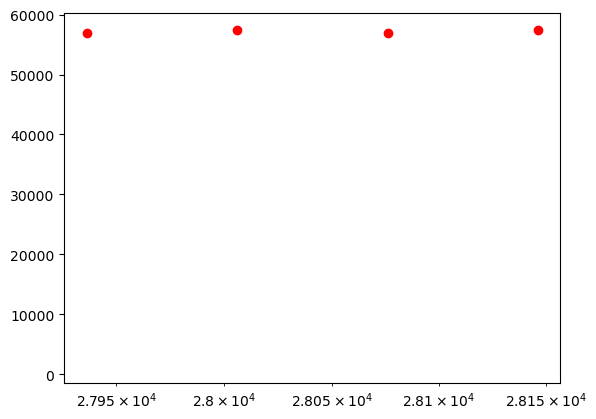

In [3]:
""" 
test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
"""

#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]


for i in range(len(data)):
    if (data['Pixel X center'][i] == -1529.978 and data['Pixel Y center'][i] == 2650.000):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)

plt.plot(testPoint[0],testPoint[1], 'ro')
plt.xscale('log') #???
plt.show()
